In [1]:
pip install pandas numpy matplotlib seaborn jupyter notebook



   ---------------------------------------- 4/4 [isoduration]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# Set the working directory to your folder
os.chdir(r"C:\Users\dhanu\OneDrive\Desktop\Co-working")

# Confirm current directory
print("Current Directory:", os.getcwd())

# List files in the directory to make sure CSVs are visible
print("Files:", os.listdir())


Current Directory: C:\Users\dhanu\OneDrive\Desktop\Co-working
Files: ['companies.csv', 'customers.csv', 'survey.csv', 'usage_monthly.csv']


In [4]:
import pandas as pd

customers = pd.read_csv("customers.csv")
usage = pd.read_csv("usage_monthly.csv")
survey = pd.read_csv("survey.csv")
companies = pd.read_csv("companies.csv")

# Quick look at the first 5 rows
print(customers.head())



  Customer_ID Company   Join_Date   Exit_Date  Monthly_Spend Location  \
0     C110650  Spaces  2020-07-28         NaN            843  Chicago   
1     C102041  WeWork  2018-07-27         NaN           1051   Austin   
2     C108668  Spaces  2022-09-28  2023-07-28            349   Denver   
3     C101114  WeWork  2023-06-03         NaN            380  Seattle   
4     C113902   Regus  2021-08-22         NaN            466   Mumbai   

   Team_Size  Churned  
0          2        0  
1          3        0  
2          1        1  
3          1        0  
4          1        0  


In [5]:
import os
import pandas as pd

# Set working directory
os.chdir(r"C:\Users\dhanu\OneDrive\Desktop\Co-working")

# Load all CSVs
customers = pd.read_csv("customers.csv")
usage = pd.read_csv("usage_monthly.csv")
survey = pd.read_csv("survey.csv")
companies = pd.read_csv("companies.csv")

# Check data shapes
print("Customers:", customers.shape)
print("Usage:", usage.shape)
print("Survey:", survey.shape)
print("Companies:", companies.shape)


Customers: (20000, 8)
Usage: (268744, 7)
Survey: (4979, 7)
Companies: (5, 8)


In [6]:
# First 5 rows of each dataset
print(customers.head())
print(usage.head())
print(survey.head())
print(companies.head())

# Info & summary
print(customers.info())
print(customers.describe())


  Customer_ID Company   Join_Date   Exit_Date  Monthly_Spend Location  \
0     C110650  Spaces  2020-07-28         NaN            843  Chicago   
1     C102041  WeWork  2018-07-27         NaN           1051   Austin   
2     C108668  Spaces  2022-09-28  2023-07-28            349   Denver   
3     C101114  WeWork  2023-06-03         NaN            380  Seattle   
4     C113902   Regus  2021-08-22         NaN            466   Mumbai   

   Team_Size  Churned  
0          2        0  
1          3        0  
2          1        1  
3          1        0  
4          1        0  
  Customer_ID Company       Month  Days_Used  Meeting_Hours  Support_Tickets  \
0     C102332   Regus  2023-03-12       19.0            1.0              0.0   
1     C114077  WeWork  2022-10-05       18.0            1.0              0.0   
2     C106461  WeWork  2020-09-06        1.0            4.0              1.0   
3     C107162   Regus  2020-07-22        4.0            1.0              1.0   
4     C101418  We

In [8]:
print(customers.columns)


Index(['Customer_ID', 'Company', 'Join_Date', 'Exit_Date', 'Monthly_Spend',
       'Location', 'Team_Size', 'Churned'],
      dtype='object')


In [10]:
print(customers.columns)


Index(['Customer_ID', 'Company', 'Join_Date', 'Exit_Date', 'Monthly_Spend',
       'Location', 'Team_Size', 'Churned'],
      dtype='object')


In [11]:
print(customers.head())


  Customer_ID Company   Join_Date   Exit_Date  Monthly_Spend Location  \
0     C110650  Spaces  2020-07-28         NaN            843  Chicago   
1     C102041  WeWork  2018-07-27         NaN           1051   Austin   
2     C108668  Spaces  2022-09-28  2023-07-28            349   Denver   
3     C101114  WeWork  2023-06-03         NaN            380  Seattle   
4     C113902   Regus  2021-08-22         NaN            466   Mumbai   

   Team_Size  Churned  
0          2        0  
1          3        0  
2          1        1  
3          1        0  
4          1        0  


In [12]:
# Convert dates to datetime
customers["Join_Date"] = pd.to_datetime(customers["Join_Date"])
customers["Exit_Date"] = pd.to_datetime(customers["Exit_Date"])

# Fill missing exit dates with 'Active'
customers["Exit_Date"] = customers["Exit_Date"].fillna("Active")

# Double-check missing values
print(customers.isnull().sum())


Customer_ID      0
Company          0
Join_Date        0
Exit_Date        0
Monthly_Spend    0
Location         0
Team_Size        0
Churned          0
dtype: int64


In [13]:
churn_rate = customers["Churned"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 19.56%


In [14]:
churn_by_company = customers.groupby("Company")["Churned"].mean().sort_values()
print(churn_by_company)


Company
WeWork         0.074741
Regus          0.169741
Industrious    0.289287
Spaces         0.302583
Knotel         0.318044
Name: Churned, dtype: float64


In [15]:
churn_by_location = customers.groupby("Location")["Churned"].mean().sort_values(ascending=False)
print(churn_by_location)


Location
Mumbai           0.212097
London           0.206738
New York         0.205150
Seattle          0.203859
Denver           0.200174
San Francisco    0.193727
Delhi            0.193459
Chicago          0.193257
Boston           0.190166
Bengaluru        0.189474
Austin           0.185821
Los Angeles      0.183920
Miami            0.181096
Name: Churned, dtype: float64


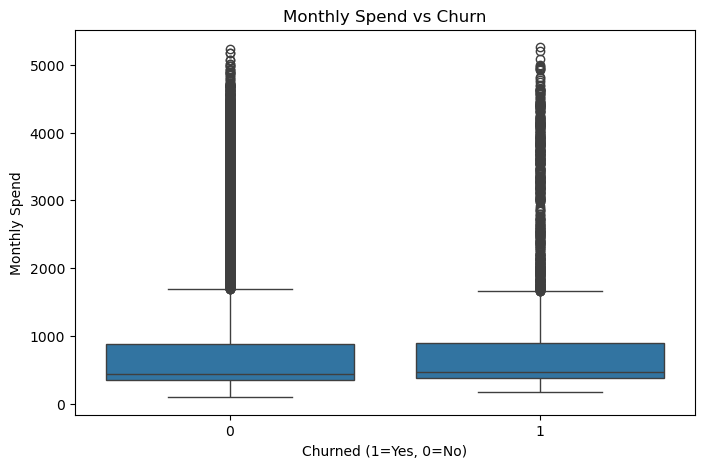

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=customers, x="Churned", y="Monthly_Spend")
plt.title("Monthly Spend vs Churn")
plt.xlabel("Churned (1=Yes, 0=No)")
plt.ylabel("Monthly Spend")
plt.show()


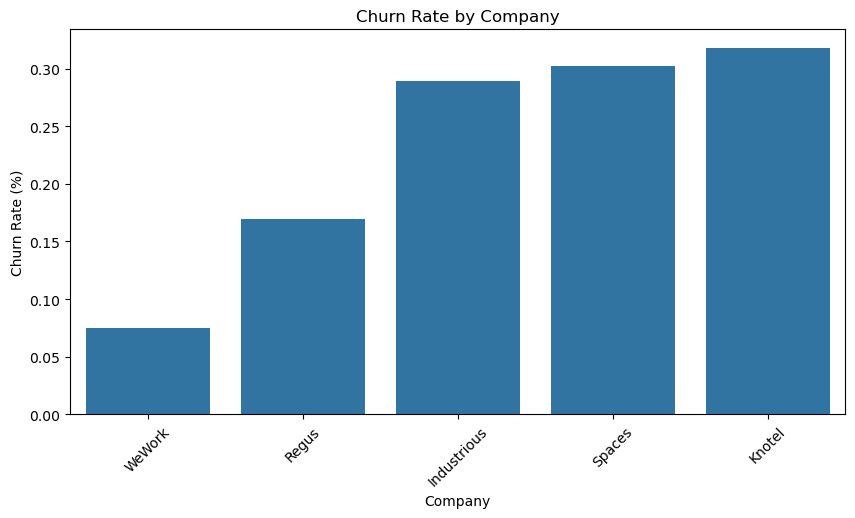

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=churn_by_company.index, y=churn_by_company.values)
plt.title("Churn Rate by Company")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.show()


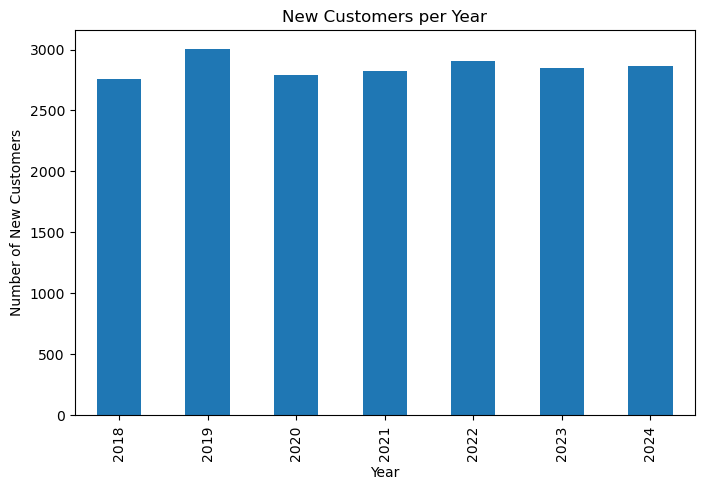

In [19]:
customers["Join_Year"] = customers["Join_Date"].dt.year
new_customers = customers.groupby("Join_Year")["Customer_ID"].count()
new_customers.plot(kind="bar", figsize=(8,5), title="New Customers per Year")
plt.xlabel("Year")
plt.ylabel("Number of New Customers")
plt.show()


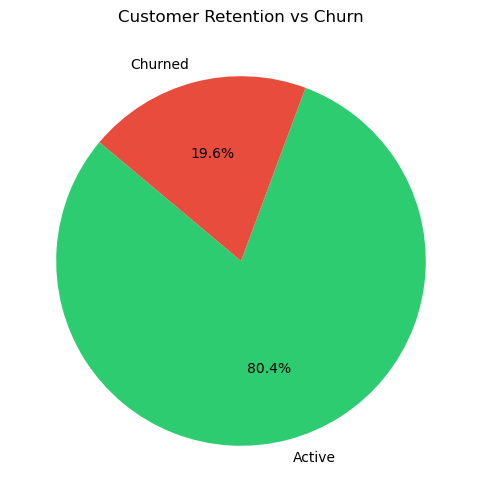

In [20]:
active_counts = customers["Churned"].value_counts()
labels = ["Active", "Churned"]

plt.figure(figsize=(6,6))
plt.pie(active_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#2ecc71","#e74c3c"])
plt.title("Customer Retention vs Churn")
plt.show()
